In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Cargar los datos**

In [ ]:
import pandas as pd

# Cargar los datos desde Google Drive
file_path = "/content/drive/My Drive/IA/Rest-Mex_2025_train.csv"
df = pd.read_csv(file_path)

# Contar instancias antes del preprocesamiento
print("Instancias antes del preprocesamiento:", len(df))

# Verificar las primeras filas
print(df.head())


Instancias antes del preprocesamiento: 208051
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de Canc√É¬∫n   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, as√≠ que un poco dif√≠cil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Canc√É¬∫n, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  


# **Preprocesamiento: Limpiar texto**

## **PASO 1: Vamos a identificar que tipo de codificacion est√° usando**
usaremos el **file_path**

In [ ]:
# Opci√≥n 1: utf-8
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Codificaci√≥n utf-8 cargada con √©xito")
    print(df.head())
except Exception as e:
    print("Error con utf-8:", e)

# Opci√≥n 2: latin1
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("Codificaci√≥n latin1 cargada con √©xito")
    print(df.head())
except Exception as e:
    print("Error con latin1:", e)

# Opci√≥n 3: cp1252 (Windows)
try:
    df = pd.read_csv(file_path, encoding='cp1252')
    print("Codificaci√≥n cp1252 cargada con √©xito")
    print(df.head())
except Exception as e:
    print("Error con cp1252:", e)


Codificaci√≥n utf-8 cargada con √©xito
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de Canc√É¬∫n   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, as√≠ que un poco dif√≠cil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Canc√É¬∫n, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  
Codificaci√≥n latin1 cargada con √©xito
                   

**Opcion B:**
Usamos Chardet y nos indicar√° que codificaci√≥n se est√° usando , claro que debemos tener en cuenta que va a demorar porque analiza todas las instancias , una alternativa seria usar una muestra de por ejem: 10Kbytes

In [ ]:
import chardet

          # Leer los primeros bytes del archivo
          #with open(file_path, 'rb') as f:
          #   result = chardet.detect(f.read(10000))  # Detecta usando los primeros 10k bytes


# Leer todo el contenido del archivo
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())  # Detecta usando todo el archivo

print("Codificaci√≥n detectada:", result['encoding'])



Codificaci√≥n detectada: utf-8


### **PASO 2: Vamos a revisar que caracteres extra√±os hay en cada instancia**
Aqui ya conociendo que la codificacion usada es utf-8

In [ ]:
import re
import pandas as pd

# Funci√≥n que eval√∫a la rareza del texto (porcentaje de caracteres "extra√±os")
def porcentaje_caracteres_no_comunes(texto):
    # Lista de caracteres v√°lidos (puedes ajustarlo si es necesario)
    caracteres_comunes = re.findall(r"[a-zA-Z√°√©√≠√≥√∫√Å√â√ç√ì√ö√±√ë√º√ú .,;:¬°!¬ø?0-9]", texto)

    # Calculamos la "rareza" como la proporci√≥n de caracteres no comunes
    return 1 - len(caracteres_comunes) / max(1, len(texto))

# Funci√≥n para identificar si un texto contiene caracteres sospechosos
def contiene_caracteres_sospechosos(texto):
    return bool(re.search(r'[√É√Ç¬¢√¢‚Ç¨≈ì√¢‚Ç¨¬ù]', texto))  # Puedes agregar m√°s patrones aqu√≠ si necesitas

# Leer el dataset
df = pd.read_csv("/content/drive/My Drive/IA/Rest-Mex_2025_train.csv", encoding="utf-8")

# Evaluamos el porcentaje de caracteres raros para cada instancia (fila)
df['error_ratio'] = df['Review'].apply(porcentaje_caracteres_no_comunes)

# Identificamos filas con m√°s del 20% de caracteres raros
filas_con_errores = df[df['error_ratio'] > 0.15]

# Mostrar las filas problem√°ticas
print("N√∫mero de filas con posibles problemas de codificaci√≥n:", filas_con_errores.shape[0])
print(filas_con_errores[['Title', 'Review', 'error_ratio']])


N√∫mero de filas con posibles problemas de codificaci√≥n: 6
                                      Title  \
41921   Es un restaurant fuera de lo com√∫n.   
94937                       variedad-comida   
121944                          Las Tinajas   
127316                            Incre√≠ble   
153199                            BUENISIMO   
170002               vista-panor√°mica-Taxco   

                                                   Review  error_ratio  
41921   Precios muy accesibles. excelente servicio. To...     0.246154  
94937   -recomiendo-bufet-buen-precio&variedad-comida(...     0.160221  
121944  Gran mole___________________________________ d...     0.660377  
127316  En res√∫men:\n\nambiente incre√≠ble comida\nincr...     0.324786  
153199  Estuve por negocio 10 d√≠as y la pas√© super bie...     0.167305  
170002  -excelente-vista\n-opciones-men√∫:\nplato-entra...     0.162963  


In [ ]:
# Eliminar las filas con m√°s del 20% de caracteres raros
df_limpio = df[df['error_ratio'] <= 0.15]

# Verificar el n√∫mero de filas despu√©s de la eliminaci√≥n
print("N√∫mero de filas despu√©s de eliminar las filas problem√°ticas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())


N√∫mero de filas despu√©s de eliminar las filas problem√°ticas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de Canc√É¬∫n   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, as√≠ que un poco dif√≠cil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Canc√É¬∫n, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.

In [ ]:
import re

# Funci√≥n de limpieza mejorada
def clean_text(text):
    text = text.strip()  # Eliminar espacios extra
    # Solo eliminar caracteres no alfab√©ticos, pero mantener los acentos y la puntuaci√≥n
    text = re.sub(r"[^a-zA-Z√°√©√≠√≥√∫√º√±√Å√â√ç√ì√ö√ú√ë0-9,.!? ]", "", text)
    return text


# Aplicar la limpieza a las rese√±as
df_limpio["Review"] = df_limpio["Review"].apply(clean_text)

# Verificar el n√∫mero de filas despu√©s de la eliminaci√≥n
print("N√∫mero de filas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())



N√∫mero de filas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de Canc√É¬∫n   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, as√≠ que un poco dif√≠cil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.026549  
4    Michoacan       Hotel     0.000000

<ipython-input-16-6edf93186282>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Review"] = df_limpio["Review"].apply(clean_text)


In [ ]:
# Eliminar filas con valores faltantes en cualquier columna
df_limpio = df_limpio.dropna()

# Asegurarse de que la columna 'Polarity' sea num√©rica
df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')

# Eliminar filas donde 'Polarity' es NaN (despu√©s de la conversi√≥n) y filtrar valores v√°lidos entre 1.0 y 5.0
df_limpio = df_limpio[(df_limpio['Polarity'] >= 1.0) & (df_limpio['Polarity'] <= 5.0)]

# Reiniciar el √≠ndice despu√©s de eliminar filas
df_limpio = df_limpio.reset_index(drop=True)

# Contar instancias despu√©s del preprocesamiento
print("Instancias despu√©s del preprocesamiento:", len(df_limpio))

# Mostrar una muestra del DataFrame limpio
print(df_limpio.head(10))



Instancias despu√©s del preprocesamiento: 208043
                                               Title  \
0                              Mi Lugar Favorito!!!!   
1                  lugares interesantes para visitar   
2                             No es el mismo Dreams    
3                  un buen panorama cerca de Canc√É¬∫n   
4                                           El mejor   
5                                           Preciosa   
6                                 Maravillosa Playa.   
7  Un muy buen lugar para quedarse y comer en Pal...   
8                                  Tiempo para mi...   
9                           Buena Ubicaci√≥n y limpio   

                                              Review  Polarity  \
0  Excelente lugar para comer y pasar una buena n...       5.0   
1  andar mucho, as√≠ que un poco dif√≠cil para pers...       4.0   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0   

<ipython-input-17-0968a9e0d10f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')


### **Distribuci√≥n (frecuencia) de longitud de palabras**

Primero revisaremos la longitud y frecuencia de estos textos para, segun lo obtenido ver si truncamos o realizamos otra tarea previa


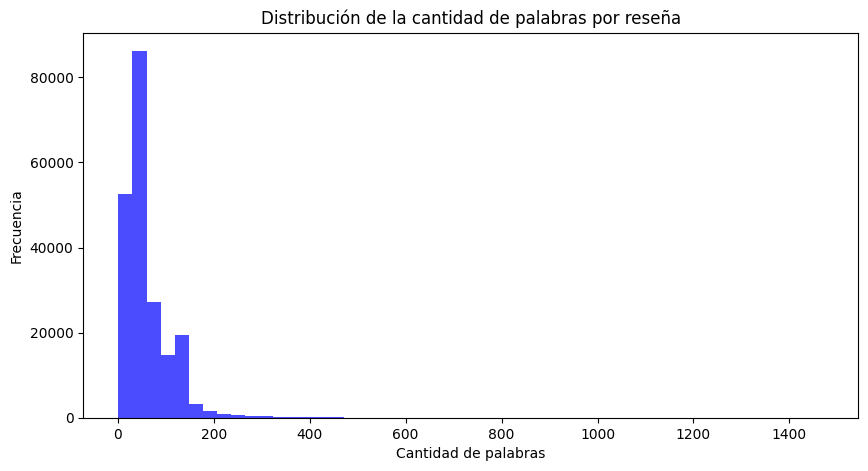

In [ ]:
import matplotlib.pyplot as plt

# Contar palabras por texto en el DataFrame limpio
df_limpio["word_count"] = df_limpio["Review"].apply(lambda x: len(x.split()))

# Graficar distribuci√≥n de cantidad de palabras
plt.figure(figsize=(10,5))
plt.hist(df_limpio["word_count"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la cantidad de palabras por rese√±a")
plt.show()




Analizando el balanceo de las instancias segun polarity

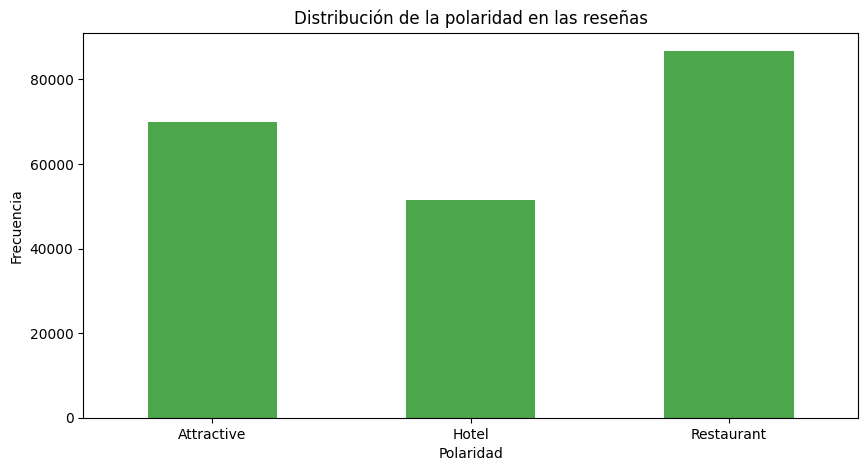

Conteo de instancias por polaridad:
Type
Attractive    69920
Hotel         51409
Restaurant    86714
Name: count, dtype: int64

Porcentaje de instancias por polaridad:
Type
Attractive    33.608437
Hotel         24.710757
Restaurant    41.680806
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de instancias por cada clase de polaridad
polaridad_counts = df_limpio['Type'].value_counts().sort_index()

# Visualizar la distribuci√≥n de la polaridad
plt.figure(figsize=(10,5))
polaridad_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la polaridad en las rese√±as")
plt.xticks(rotation=0)
plt.show()

# Mostrar el conteo de instancias por clase de polaridad
print("Conteo de instancias por polaridad:")
print(polaridad_counts)

# Calcular el porcentaje de cada clase de polaridad
polaridad_percentage = (polaridad_counts / polaridad_counts.sum()) * 100
print("\nPorcentaje de instancias por polaridad:")
print(polaridad_percentage)


Con los resultados podemos observar que la distribuci√≥n de Polarity est√° bastante desbalanceada. La mayor√≠a de las instancias (alrededor del 65.64%) est√°n en la clase Polarity = 5.0, mientras que las otras clases tienen una representaci√≥n mucho menor. Esto podr√≠a ser un problema para modelos de machine learning, ya que podr√≠an estar sesgados hacia la clase m√°s frecuente.

## **Submuestreo (undersampling)**
La biblioteca **imbalanced-learn** tiene una implementaci√≥n sencilla de undersampling llamada **RandomUnderSampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Supongo que df_limpio es el DataFrame limpio con las rese√±as y la polaridad

# Dividir el dataset en caracter√≠sticas (X) y etiquetas (y)
X = df_limpio.drop('Type', axis=1)
y = df_limpio['Type']

# Aplicar el submuestreo (undersampling) sobre el conjunto completo
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Verificar la distribuci√≥n de clases despu√©s del submuestreo
print("Distribuci√≥n de clases despu√©s de submuestro (undersampling):")
print(y_resampled.value_counts())

# Ahora X_resampled y y_resampled contienen los datos balanceados.


Distribuci√≥n de clases despu√©s de submuestro (undersampling):
Type
Attractive    51409
Hotel         51409
Restaurant    51409
Name: count, dtype: int64


### **REENSAMBLANDO**
en uno dataframe nuevo llamado **df_new**

In [ ]:
# Crear un nuevo DataFrame con las caracter√≠sticas y etiquetas balanceadas
df_new = pd.DataFrame(X_resampled, columns=X.columns)  # Las columnas de X
df_new['Type'] = y_resampled  # Agregar la columna 'Polarity' con las etiquetas balanceadas


# üîπ Reiniciar los √≠ndices del DataFrame
df_new.reset_index(drop=True, inplace=True)

# Ver las primeras filas del DataFrame
print(df_new.head())

# üîπ Guardar el DataFrame en un archivo CSV temporal en la memoria de Colab
df_new.to_csv("/content/df_balanceado.csv", index=False)

# üîπ C√≥digo para descargar el archivo
#from google.colab import files
#files.download("/content/df_balanceado.csv")


                                  Title  \
0  Bonito pero consultaciones Vic Falls   
1                         Digno de ver!   
2                       Hermoso es poco   
3  El origen del PH?,.. yo creo que s√≠.   
4   Cansado para adultos de la 4ta edad   

                                              Review  Polarity      Town  \
0  No est√° mal, pero es bastante peatonal . Largo...       3.0  Palenque   
1  Ya he visto muchos del mundo, pero esto es inc...       5.0     Tulum   
2  Es un excelente lugar, super accesible el acce...       5.0   Bacalar   
3  Intersante lugar de Orizaba. Los peque√±os muse...       4.0   Orizaba   
4  Con el calor de la Riviera Maya sin duda es to...       4.0     Tulum   

        Region  error_ratio  word_count        Type  
0      Chiapas     0.000000          26  Attractive  
1  QuintanaRoo     0.012605          43  Attractive  
2  QuintanaRoo     0.001709          99  Attractive  
3     Veracruz     0.002252          80  Attractive  
4  Quintana

In [ ]:
# Contar instancias despu√©s del preprocesamiento
print("Instancias despu√©s del reemsablar:", len(df_new))

Instancias despu√©s del reemsablar: 154227


In [ ]:
print(df_new['Type'].value_counts())


Type
Attractive    51409
Hotel         51409
Restaurant    51409
Name: count, dtype: int64


In [ ]:
from transformers import BertTokenizer

# Cargar el tokenizer de BERT en espa√±ol
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# Tokenizar las rese√±as sin truncation ni padding
token_lengths = [len(tokenizer.encode(text, truncation=False, padding=False)) for text in df_new["Review"]]

# Ver las primeras longitudes de los tokens para ver c√≥mo quedan
print(token_lengths[:10])  # Imprimir las primeras 10 longitudes de tokens


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


[37, 56, 125, 106, 150, 24, 41, 196, 28, 43]


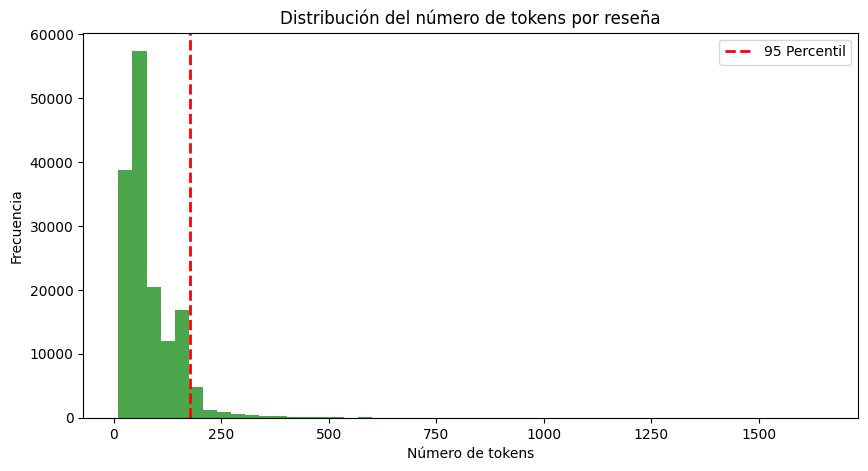

Media de tokens: 83.18
Mediana de tokens: 62.00
90 percentil: 164.00 tokens
95 percentil: 177.00 tokens
99 percentil: 298.00 tokens
Recomendaci√≥n para max_length en el tokenizer: 177 tokens
Cantidad de rese√±as que superan el 95 percentil de tokens: 7660


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizar distribuci√≥n de tokens
plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50, color='green', alpha=0.7)
plt.xlabel("N√∫mero de tokens")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n del n√∫mero de tokens por rese√±a")

# Agregar l√≠nea para el percentil 95
plt.axvline(np.percentile(token_lengths, 95), color='red', linestyle='dashed', linewidth=2, label='95 Percentil')
plt.legend()

plt.show()

# Obtener estad√≠sticas
mean_tokens = np.mean(token_lengths)
median_tokens = np.median(token_lengths)
percentile_90 = np.percentile(token_lengths, 90)
percentile_95 = np.percentile(token_lengths, 95)
percentile_99 = np.percentile(token_lengths, 99)

# Imprimir estad√≠sticas
print(f"Media de tokens: {mean_tokens:.2f}")
print(f"Mediana de tokens: {median_tokens:.2f}")
print(f"90 percentil: {percentile_90:.2f} tokens")
print(f"95 percentil: {percentile_95:.2f} tokens")
print(f"99 percentil: {percentile_99:.2f} tokens")

# Recomendaci√≥n para max_length
recommended_max_tokens = int(percentile_95)
print(f"Recomendaci√≥n para max_length en el tokenizer: {recommended_max_tokens} tokens")

# Opcional: Verificar cu√°ntas rese√±as superan el percentil 95
long_reviews = sum([token_length > recommended_max_tokens for token_length in token_lengths])
print(f"Cantidad de rese√±as que superan el 95 percentil de tokens: {long_reviews}")


In [ ]:
# Ver valores √∫nicos originales
print("Valores √∫nicos antes de la actualizaci√≥n:", sorted(df_new['Type'].unique()))


Valores √∫nicos antes de la actualizaci√≥n: ['Attractive', 'Hotel', 'Restaurant']


In [ ]:
import numpy as np

# Mapeo deseado
type_mapping = {
    'Attractive': 0,
    'Hotel': 1,
    'Restaurant': 2
}

# Aplicar el mapeo a la columna 'Type' y crear/actualizar la columna 'Polarity'
df_new['Type'] = df_new['Type'].map(type_mapping).astype(np.int64)

# Verificar valores √∫nicos despu√©s de la transformaci√≥n
print("Valores √∫nicos despu√©s de la actualizaci√≥n:", sorted(df_new['Type'].unique()))


Valores √∫nicos despu√©s de la actualizaci√≥n: [np.int64(0), np.int64(1), np.int64(2)]


In [ ]:
# Ver filas del √≠ndice 1 al 10 despu√©s de la actualizaci√≥n
print(df_new.iloc[24011:24021])


                                   Title  \
24011             No se lo pueden perder   
24012                    Casa de duendes   
24013      Parte hist√≥rica parte natural   
24014           Y m√°s azul qu√© el cielo.   
24015                          Excelente   
24016    Nataci√≥n y zip forro de Cenote.   
24017        7 km de playa impresionante   
24018                  Inmejorable vista   
24019                     El mejor lejos   
24020  No regresaremos, mala ecpetiencia   

                                                  Review  Polarity  \
24011  El museo est√° lleno de escenas t√≠picas de la v...       5.0   
24012  El lugar para se un lugar peque√±o te hace sent...       4.0   
24013  Incre√≠ble parada cultural con tanta cultura ma...       5.0   
24014  De los cenotes m√°s hermosos que he conocido. T...       5.0   
24015  Me gust√≥ mucho la caminata de Tepozteco mucho....       5.0   
24016  Excursi√≥n impresionante a trav√©s de la jungla ...       5.0   
24017  Tan re

In [ ]:
# Contar las instancias por cada valor de 'Polarity'
polarity_counts = df_new['Type'].value_counts().sort_index()

# Imprimir el resumen de las instancias por polaridad
print("Resumen de las instancias por polaridad:")
print(polarity_counts)


Resumen de las instancias por polaridad:
Type
0    51409
1    51409
2    51409
Name: count, dtype: int64


**Fin de paso 2**


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import torch

# Usar el percentil 95 como max_length (has decidido basarte en esto)
#recommended_max_tokens = int(percentile_95)
recommended_max_tokens = 220

# üîπ Concatenar 'Title' y 'Review' en una sola cadena de texto por fila, llamada nuevamente Review2
df_new['Review2'] = df_new['Title'] + ". " + df_new['Review']  # Puedes ajustar el separador si quieres

# üîπ Dividir los datos balanceados (df_new) en entrenamiento (75%) y prueba (25%)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_new["Review2"].tolist(),         # Lista de rese√±as
    df_new["Type"].tolist(),      # Lista de etiquetas
    test_size=0.25,                   # 25% para test
    random_state=42                   # Para reproducibilidad
)

# üîπ Ahora dividir el conjunto de entrenamiento en entrenamiento (80%) y validaci√≥n (20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels,
    test_size=0.20,                   # 20% de los datos de entrenamiento va a validaci√≥n
    random_state=42
)




# **TOKENIZACION**

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# üîπ Tokenizar las rese√±as con truncamiento y padding
# return_tensors="pt" devuelve tensores de PyTorch
train_encodings = tokenizer(train_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")


# Ver las primeras filas con el texto concatenado
print(df_new[['Title', 'Review', 'Review2','Type']].head())

                                  Title  \
0  Bonito pero consultaciones Vic Falls   
1                         Digno de ver!   
2                       Hermoso es poco   
3  El origen del PH?,.. yo creo que s√≠.   
4   Cansado para adultos de la 4ta edad   

                                              Review  \
0  No est√° mal, pero es bastante peatonal . Largo...   
1  Ya he visto muchos del mundo, pero esto es inc...   
2  Es un excelente lugar, super accesible el acce...   
3  Intersante lugar de Orizaba. Los peque√±os muse...   
4  Con el calor de la Riviera Maya sin duda es to...   

                                             Review2  Type  
0  Bonito pero consultaciones Vic Falls. No est√° ...     0  
1  Digno de ver!. Ya he visto muchos del mundo, p...     0  
2  Hermoso es poco. Es un excelente lugar, super ...     0  
3  El origen del PH?,.. yo creo que s√≠.. Intersan...     0  
4  Cansado para adultos de la 4ta edad. Con el ca...     0  


### **VERIFICANDO LAS ETIQUETAS**

In [ ]:
# Verificar los primeros valores de 'Polarity' en df_new
print("Primeras 5 etiquetas en df_new['Type']:", df_new['Type'][:5])

# Verificar las primeras 5 etiquetas en train_labels
print("Primeras 5 etiquetas en train_labels:", train_labels[:5])


Primeras 5 etiquetas en df_new['Type']: 0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: int64
Primeras 5 etiquetas en train_labels: [2, 2, 2, 1, 2]


### **nuevo**

In [ ]:
import torch

# Verificar tama√±os
print(f"Cantidad de textos de entrenamiento: {len(train_texts)}")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}")
print(f"Cantidad de textos de validaci√≥n: {len(val_texts)}")
print(f"Cantidad de etiquetas de validaci√≥n: {len(val_labels)}")
print(f"Cantidad de textos de prueba: {len(test_texts)}")
print(f"Cantidad de etiquetas de prueba: {len(test_labels)}")

# Verificar si las etiquetas y textos est√°n correctamente alineados (es decir, el n√∫mero de etiquetas coincide con el n√∫mero de textos)
assert len(train_texts) == len(train_labels), "El n√∫mero de textos de entrenamiento no coincide con el n√∫mero de etiquetas"
assert len(val_texts) == len(val_labels), "El n√∫mero de textos de validaci√≥n no coincide con el n√∫mero de etiquetas"
assert len(test_texts) == len(test_labels), "El n√∫mero de textos de prueba no coincide con el n√∫mero de etiquetas"

# Verificar una muestra de las primeras 3 entradas
print(f"Primeras 3 rese√±as de entrenamiento: {train_texts[:3]}")
print(f"Primeras 3 etiquetas de entrenamiento: {train_labels[:3]}")


Cantidad de textos de entrenamiento: 92536
Cantidad de etiquetas de entrenamiento: 92536
Cantidad de textos de validaci√≥n: 23134
Cantidad de etiquetas de validaci√≥n: 23134
Cantidad de textos de prueba: 38557
Cantidad de etiquetas de prueba: 38557
Primeras 3 rese√±as de entrenamiento: ['Opci√≥n diferente. Es un lugar peque√±ito pero es una buena opci√≥n para disfrutar de un concepto diferente. Son expertos en pan artesanal y pasta. En este lugar se ve que hay pasi√≥n por lo que hacen.', 'Excelente lugar. Es, en mi opini√≥n, el mejor lugar para comer en Metepec llevo viviendo ah√≠ casi 20 a√±os buena cocina, magn√≠fica ambientaci√≥n y el servicio es buen√≠simo', 'riqu√≠simo!. Hay comida deliciosa y poco usual, de diversos paises del mundo, lo que pidas esta delicioso y llenador! Son porciones grandes, vale la pena pedir dos y compartir, las bebidas tambien estan deliciosas, un lugar ademas con vista agradable y t tratan muy bien.']
Primeras 3 etiquetas de entrenamiento: [2, 2, 2]


In [ ]:
# Verificar el tipo y tama√±o de los tensores despu√©s de la tokenizaci√≥n
print(f"Tama√±o de los tensores de entrenamiento: {train_encodings['input_ids'].shape}")
print(f"Tama√±o de los tensores de validaci√≥n: {val_encodings['input_ids'].shape}")
print(f"Tama√±o de los tensores de prueba: {test_encodings['input_ids'].shape}")

# Verificar que las etiquetas sean tensores y tengan la misma longitud que los tensores de entrada
train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)
test_labels_tensor = torch.tensor(test_labels)

print(f"Tama√±o de las etiquetas de entrenamiento: {train_labels_tensor.shape}")
print(f"Tama√±o de las etiquetas de validaci√≥n: {val_labels_tensor.shape}")
print(f"Tama√±o de las etiquetas de prueba: {test_labels_tensor.shape}")


Tama√±o de los tensores de entrenamiento: torch.Size([92536, 220])
Tama√±o de los tensores de validaci√≥n: torch.Size([23134, 220])
Tama√±o de los tensores de prueba: torch.Size([38557, 220])
Tama√±o de las etiquetas de entrenamiento: torch.Size([92536])
Tama√±o de las etiquetas de validaci√≥n: torch.Size([23134])
Tama√±o de las etiquetas de prueba: torch.Size([38557])


### **CONTINUAMOS CON LA CONVERSION DE LAS ETIQUETAS A PYTORCH**

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Convertir etiquetas a tensores
train_labels_tensor = torch.tensor(train_labels).clone().detach()  # Convertir a tensor y evitar gradientes
val_labels_tensor = torch.tensor(val_labels).clone().detach()  # Convertir a tensor y evitar gradientes
test_labels_tensor = torch.tensor(test_labels).clone().detach()  # Convertir a tensor y evitar gradientes

# Crear datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'].clone().detach(),  # Usamos clone().detach() en lugar de torch.tensor()
    train_encodings['attention_mask'].clone().detach(),  # Lo mismo aqu√≠
    train_labels_tensor
)

val_dataset = TensorDataset(
    val_encodings['input_ids'].clone().detach(),  # Lo mismo aqu√≠
    val_encodings['attention_mask'].clone().detach(),  # Lo mismo aqu√≠
    val_labels_tensor
)

test_dataset = TensorDataset(
    test_encodings['input_ids'].clone().detach(),  # Lo mismo aqu√≠
    test_encodings['attention_mask'].clone().detach(),  # Lo mismo aqu√≠
    test_labels_tensor
)

# Crear DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# üîπ Verificar la primera entrada de un batch para asegurar que todo est√© bien
print("Ejemplo de batch del DataLoader de entrenamiento:")
for batch in train_dataloader:
    input_ids_batch, attention_mask_batch, labels_batch = batch
    print(f"Input IDs shape: {input_ids_batch.shape}")
    print(f"Attention Mask shape: {attention_mask_batch.shape}")
    print(f"Labels shape: {labels_batch.shape}")
    break  # Solo imprimimos el primer batch

# üîπ Verificar que las longitudes de las listas de datos y etiquetas coincidan
print(f"Cantidad de textos de entrenamiento: {len(train_labels_tensor)}")
print(f"Cantidad de textos de validaci√≥n: {len(val_labels_tensor)}")
print(f"Cantidad de textos de prueba: {len(test_labels_tensor)}")



Ejemplo de batch del DataLoader de entrenamiento:
Input IDs shape: torch.Size([16, 220])
Attention Mask shape: torch.Size([16, 220])
Labels shape: torch.Size([16])
Cantidad de textos de entrenamiento: 92536
Cantidad de textos de validaci√≥n: 23134
Cantidad de textos de prueba: 38557


In [ ]:
num_labels = len(set(train_labels))
print(f"El n√∫mero de etiquetas √∫nicas en el conjunto de entrenamiento es: {num_labels}")

El n√∫mero de etiquetas √∫nicas en el conjunto de entrenamiento es: 3


Optimizador

In [ ]:
import torch
from torch.optim import AdamW  # Cambio en la importaci√≥n de AdamW
import torch.nn as nn
from transformers import BertForSequenceClassification

# Paso 1: Seleccionar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‚úÖ Usando el dispositivo: {device}")

# Paso 2: Cargar modelo BERT preentrenado en ingl√©s para clasificaci√≥n con 5 clases ---------------------
model = BertForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

# Paso 3: Congelar capas de BERT (por ejemplo, las primeras 6 de 12)
for name, param in model.bert.encoder.layer[:6].named_parameters():
    param.requires_grad = False
print("üîí Capas congeladas: 0 a 5")

# Paso 4: Mover modelo al dispositivo (GPU o CPU)
model.to(device)

# Paso 5: Optimizaci√≥n y funci√≥n de p√©rdida
optimizer = AdamW(model.parameters(), lr=1e-5) # Ajustar la tasa de aprendizaje si es necesario

# Definir la funci√≥n de p√©rdida (Cross Entropy Loss)
criterion = nn.CrossEntropyLoss()

‚úÖ Usando el dispositivo: cuda


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


üîí Capas congeladas: 0 a 5


In [ ]:
import numpy as np

# Verificar las primeras 5 etiquetas
print("Primeras 5 etiquetas:", train_labels[:5])

# Comprobar si alguna etiqueta es un vector one-hot
for i, label in enumerate(train_labels[:10]):  # Verifica las primeras 10 etiquetas
    if isinstance(label, list) or isinstance(label, np.ndarray):
        if sum(label) != 1:
            print(f"Etiqueta en formato one-hot en el √≠ndice {i}: {label}")
        else:
            print(f"Etiqueta en formato one-hot v√°lida en el √≠ndice {i}: {label}")
    else:
        print(f"Etiqueta en formato √≠ndice de clase en el √≠ndice {i}: {label}")

Primeras 5 etiquetas: [2, 2, 2, 1, 2]
Etiqueta en formato √≠ndice de clase en el √≠ndice 0: 2
Etiqueta en formato √≠ndice de clase en el √≠ndice 1: 2
Etiqueta en formato √≠ndice de clase en el √≠ndice 2: 2
Etiqueta en formato √≠ndice de clase en el √≠ndice 3: 1
Etiqueta en formato √≠ndice de clase en el √≠ndice 4: 2
Etiqueta en formato √≠ndice de clase en el √≠ndice 5: 0
Etiqueta en formato √≠ndice de clase en el √≠ndice 6: 0
Etiqueta en formato √≠ndice de clase en el √≠ndice 7: 1
Etiqueta en formato √≠ndice de clase en el √≠ndice 8: 2
Etiqueta en formato √≠ndice de clase en el √≠ndice 9: 0


### **Parte 5: Entrenamiento (model.train())**
Aqu√≠ es donde ocurre el fine-tuning real, es decir, se ajustan los pesos del modelo con tus propios datos.

Lo que sucede:
* Se activa el modo entrenamiento (model.train()).
* Se pasan los datos por el modelo (outputs = model(...)).
* Se calcula la p√©rdida (loss = outputs.loss).
* Se hace backpropagation (loss.backward()).
* Se actualizan los pesos con el optimizador (optimizer.step()).

**02 de Mayo Full data**

In [ ]:
import os
import matplotlib.pyplot as plt

# ---------------- Listas para guardar m√©tricas  ----------------------------
train_losses = []
val_losses = []
val_accuracies = []
#----------------------------------------------------------------------------

# Inicializar early stopping
best_val_loss = float('inf')
patience = 2  # N√∫mero de √©pocas sin mejora para detener
patience_counter = 0

# N√∫mero de √©pocas de entrenamiento
num_epochs = 10  # Puedes aumentarlo gracias a early stopping

# üìÇ Carpeta donde guardar√°s el mejor modelo
best_model_dir = "/content/drive/MyDrive/IA/best_model_types"
os.makedirs(best_model_dir, exist_ok=True)

# ========================== ENTRENAMIENTO ==========================
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:  # üîÑ corregido
        input_ids, attention_mask, labels = [item.to(device) for item in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # ---------------- Evaluaci√≥n ----------------
    model.eval()
    total_val_loss = 0
    correct_predictions = 0

    for batch in val_dataloader:  # üîÑ corregido
        input_ids, attention_mask, labels = [item.to(device) for item in batch]

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        total_val_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += (preds == labels).sum().item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    accuracy = correct_predictions / len(val_dataloader.dataset)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"  üîπ Train loss: {avg_train_loss:.4f}")
    print(f"  üîπ Validation loss: {avg_val_loss:.4f}")
    print(f"  ‚úÖ Validation accuracy: {accuracy * 100:.2f}%")

    # ---------- EARLY STOPPING ----------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0

        # ‚úÖ Guardar modelo y tokenizer
        model.save_pretrained(best_model_dir)
        tokenizer.save_pretrained(best_model_dir)
        print(f"üíæ Mejor modelo guardado en {best_model_dir}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("üõë Early stopping activado.")
            break

# ---------------- GRAFICAR RESULTADOS ----------------
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("P√©rdida de entrenamiento vs validaci√≥n")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot([acc * 100 for acc in val_accuracies], label='Validation Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Precisi√≥n en validaci√≥n por √©poca")
plt.legend()
plt.grid(True)
plt.show()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from transformers import BertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# üì• Cargar mejor modelo entrenado con 3 clases (Attractive, Hotel, Restaurant)
best_model = BertForSequenceClassification.from_pretrained(best_model_dir).to(device)
best_model.eval()

all_preds = []
all_labels = []

# üîç Realizar predicciones
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = best_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# üìä Calcular m√©tricas
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
report = classification_report(all_labels, all_preds, digits=4)

# üñ®Ô∏è Mostrar m√©tricas
print("\nüìä Resultados en el conjunto de TEST:")
print(f"‚úÖ Accuracy:  {accuracy:.4f}")
print(f"‚úÖ Precision: {precision:.4f}")
print(f"‚úÖ Recall:    {recall:.4f}")
print(f"‚úÖ F1 Score:  {f1:.4f}")
print("\nüìÑ Reporte de clasificaci√≥n por clase:\n")
print(report)

# üß± Matriz de confusi√≥n
label_map = {0: "Attractive", 1: "Hotel", 2: "Restaurant"}
labels_names = [label_map[i] for i in sorted(label_map.keys())]

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta real")
plt.title("üß± Matriz de Confusi√≥n en Test Set")
plt.tight_layout()
plt.show()


**Pruebas con el conjunto Test**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from transformers import BertForSequenceClassification

# Cargar mejor modelo entrenado con 3 etiquetas (Attractive, Hotel, Restaurant)
best_model = BertForSequenceClassification.from_pretrained(best_model_dir).to(device)
best_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = best_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# M√©tricas
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
report = classification_report(all_labels, all_preds, digits=4)

print("\nüìä Resultados en el conjunto de TEST:")
print(f"‚úÖ Accuracy:  {accuracy:.4f}")
print(f"‚úÖ Precision: {precision:.4f}")
print(f"‚úÖ Recall:    {recall:.4f}")
print(f"‚úÖ F1 Score:  {f1:.4f}")
print("\nüìÑ Reporte de clasificaci√≥n por clase:\n")
print(report)


**Cargar Modelo BERT previamente entrenado para clasificaci√≥n de texto**

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# 1. üì• Leer el archivo
file_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test.xlsx"
df_test = pd.read_excel(file_path)

# 2. üßæ Concatenar 'Title' y 'Review'
df_test["text"] = df_test["Title"].astype(str) + ". " + df_test["Review"].astype(str)

# 3. üî§ Cargar el tokenizer correcto
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 4. üß† Cargar el modelo entrenado para Types
model_path = "/content/drive/MyDrive/IA/best_model_types"
model = BertForSequenceClassification.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
model.eval()

# 5. üßπ Tokenizar los textos
encodings = tokenizer(df_test['text'].tolist(),
                      truncation=True,
                      padding=True,
                      max_length=128,
                      return_tensors="pt")

# 6. üì¶ Crear DataLoader
dataset = TensorDataset(encodings["input_ids"], encodings["attention_mask"])
dataloader = DataLoader(dataset, batch_size=32)

# 7. üîç Predicci√≥n
all_preds = []

with torch.no_grad():
    for batch in tqdm(dataloader, desc="Clasificando Types"):
        input_ids, attention_mask = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())

# 8. üîÅ Opcional: Mapear predicciones de n√∫meros a etiquetas si se quiere
type_reverse_mapping = {
    0: "Attractive",
    1: "Hotel",
    2: "Restaurant"
}
predicted_labels = [type_reverse_mapping[p] for p in all_preds]

# 9. üíæ Guardar resultados
df_result = pd.DataFrame({
    "ID": df_test["ID"],
    "Predicted_Type": predicted_labels  # o usa all_preds si prefieres los n√∫meros
})

output_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test_results_types.csv"
df_result.to_csv(output_path, index=False)

print(f"‚úÖ Resultados guardados en: {output_path}")
